# Object Recognition on CIFAR-10 Data Set

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17148403904525856678
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 5071812105472484396
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 694345689735871309
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11326753997
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14511665416962456353
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [2]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [ ]:
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [4]:
(X_train,y_train), (X_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [5]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
# a single image
print(X_train[0].shape)

(32, 32, 3)


In [7]:
np.where(y_train[:]==6)

(array([    0,    19,    22, ..., 49962, 49966, 49996]),
 array([0, 0, 0, ..., 0, 0, 0]))

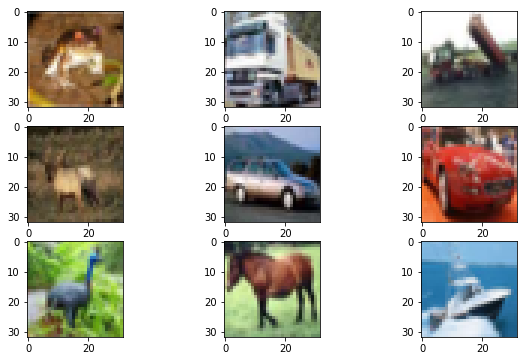

In [8]:
fig,ax=plt.subplots(3,3,figsize=(10,6))

for idx,axes in enumerate(ax.flatten()):
    axes.imshow(X_train[idx])
plt.show()

In [ ]:
# lets normalize the features
np.random.seed(6)
(X_train,y_train), (X_test,y_test)=cifar10.load_data()

X_train=X_train.astype("float32")
X_test=X_test.astype("float32")


X_train/= 255.0
X_test/= 255.0

In [10]:
# lets explore class labels

print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [11]:
X_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [ ]:
# one hot encoding

y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

num_class=y_test.shape[1]

In [13]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout,Activation,Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

In [ ]:
def allcnn(weights=None):
    model=Sequential()
    
    model.add(Conv2D(96,(3,3),padding='same',input_shape=(32,32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding='same',strides=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding='same',strides=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(1,1),padding='valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10,(1,1),padding='valid'))
    
    
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    if weights:
        model.load_weights(weights)
        
    return model

In [16]:
# learning_rate=0.01
# weight_decay=1e-6
# momentum=0.9

model=allcnn()

sgd=SGD(lr=0.01,decay=1e-6,momentum=0.9,nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
model.summary()

W0708 06:17:51.842870 140687963522944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0708 06:17:51.850534 140687963522944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 06:17:51.863790 140687963522944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0708 06:17:51.930587 140687963522944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0708 06:17:51.946048 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 192)       166080    
__________

In [17]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=350,batch_size=32,
         verbose=1)

W0708 06:18:05.767228 140687963522944 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/350
50000/50000 [==============================] - 72s 1ms/step - loss: 1.9975 - acc: 0.2429 - val_loss: 1.6704 - val_acc: 0.3783
Epoch 2/350
50000/50000 [==============================] - 67s 1ms/step - loss: 1.5148 - acc: 0.4396 - val_loss: 1.3258 - val_acc: 0.5218
Epoch 3/350
50000/50000 [==============================] - 67s 1ms/step - loss: 1.2262 - acc: 0.5556 - val_loss: 1.1430 - val_acc: 0.5913
Epoch 4/350
50000/50000 [==============================] - 67s 1ms/step - loss: 1.0304 - acc: 0.6331 - val_loss: 0.9765 - val_acc: 0.6537
Epoch 5/350
50000/50000 [==============================] - 67s 1ms/step - loss: 0.9033 - acc: 0.6797 - val_loss: 0.8622 - val_acc: 0.6941
Epoch 6/350
50000/50000 [==============================] - 67s 1ms/step - loss: 0.8108 - acc: 0.7139 - val_loss: 0.7843 - val_acc: 0.7232
Epoch 7/350
50000/50000 [==============================] - 66s 1ms/step - loss: 0.7260 - acc: 0.7462 - val_loss: 0.6976 - 

In [18]:
scores=model.evaluate(X_test,y_test,verbose=1)

print(f'ACCURACY:{scores[1]}')

10000/10000 [==============================] - 4s 412us/step
ACCURACY:0.828


In [19]:
classes=range(0,10)

names=["ariplane",'automobile',"bird","cat","deer","dog","frog","horse","ship","truck"]

class_labels=dict(zip(classes,names))

print(class_labels)

{0: 'ariplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [20]:
# lets generate batch of 9 images to predict

batch=X_test[110:119]

labels=np.argmax(y_test[110:119],axis=-1)

predictions=model.predict(batch,verbose=1)

9/9 [==============================] - 0s 20ms/step


In [21]:
# lets print the predictions

print(predictions)

[[1.0885022e-12 6.9062963e-13 2.7244994e-05 1.2063592e-08 9.9951601e-01
  4.0697044e-04 4.2589712e-05 7.0535930e-06 6.8050135e-16 3.5050327e-16]
 [1.0000000e+00 1.0032316e-24 2.9913247e-19 1.1474705e-26 1.1461297e-30
  1.2409823e-32 6.7862647e-32 4.8692848e-37 1.0955802e-18 4.2333014e-29]
 [1.1386620e-08 3.2224505e-17 1.0000000e+00 8.4288035e-11 1.8183727e-12
  1.6279002e-12 3.6108935e-10 6.5328665e-16 1.9400553e-14 1.1167795e-18]
 [2.7546228e-17 2.9715939e-23 9.9907231e-01 9.2766952e-04 8.7849398e-12
  2.8656447e-13 5.5347204e-08 1.4702137e-14 4.1569017e-21 8.1631689e-20]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.3683307e-21]
 [7.4403478e-12 5.5172179e-16 2.5864529e-14 1.0000000e+00 5.0821892e-11
  1.3684241e-11 1.6195591e-13 8.4467688e-10 1.0737682e-16 1.7471398e-14]
 [1.0000000e+00 1.3819713e-19 2.0431542e-11 1.6997529e-12 2.3412004e-12
  8.6521324e-16 7.3458441e-19 2.3215400e-17 2.4673261e-08 

In [ ]:
# the probability of each class, thats why we have 10 predictions for each image

In [ ]:
# use np.argmax() to convert class probabilities to class labels
class_results=np.argmax(predictions,axis=-1)

In [25]:
print(class_results)

[4 0 2 2 1 3 0 4 2]


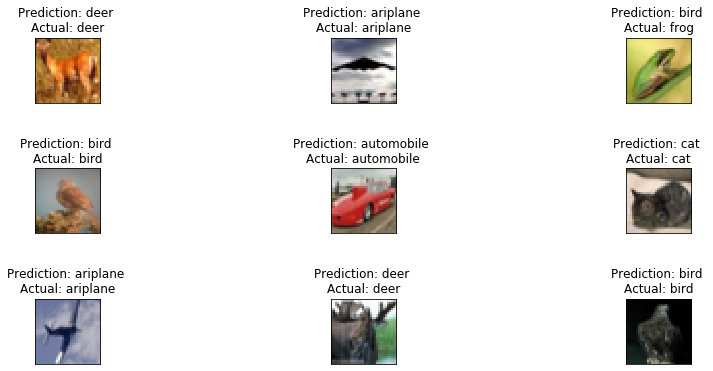

In [28]:
#lets create a grid 3X3 images

fig, axs=plt.subplots(3,3,figsize=(15,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()

for i, img in enumerate(batch):
  #determine label for each prediction
  
  for key, value in class_labels.items():
    if class_results[i] == key:
      title=f'Prediction: {class_labels[key]} \nActual: {class_labels[labels[i]]}'
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)
      
      axs[i].imshow(img)  
#   axs[i].imshow(img.transpose([1,2,0]))
  
plt.show()



